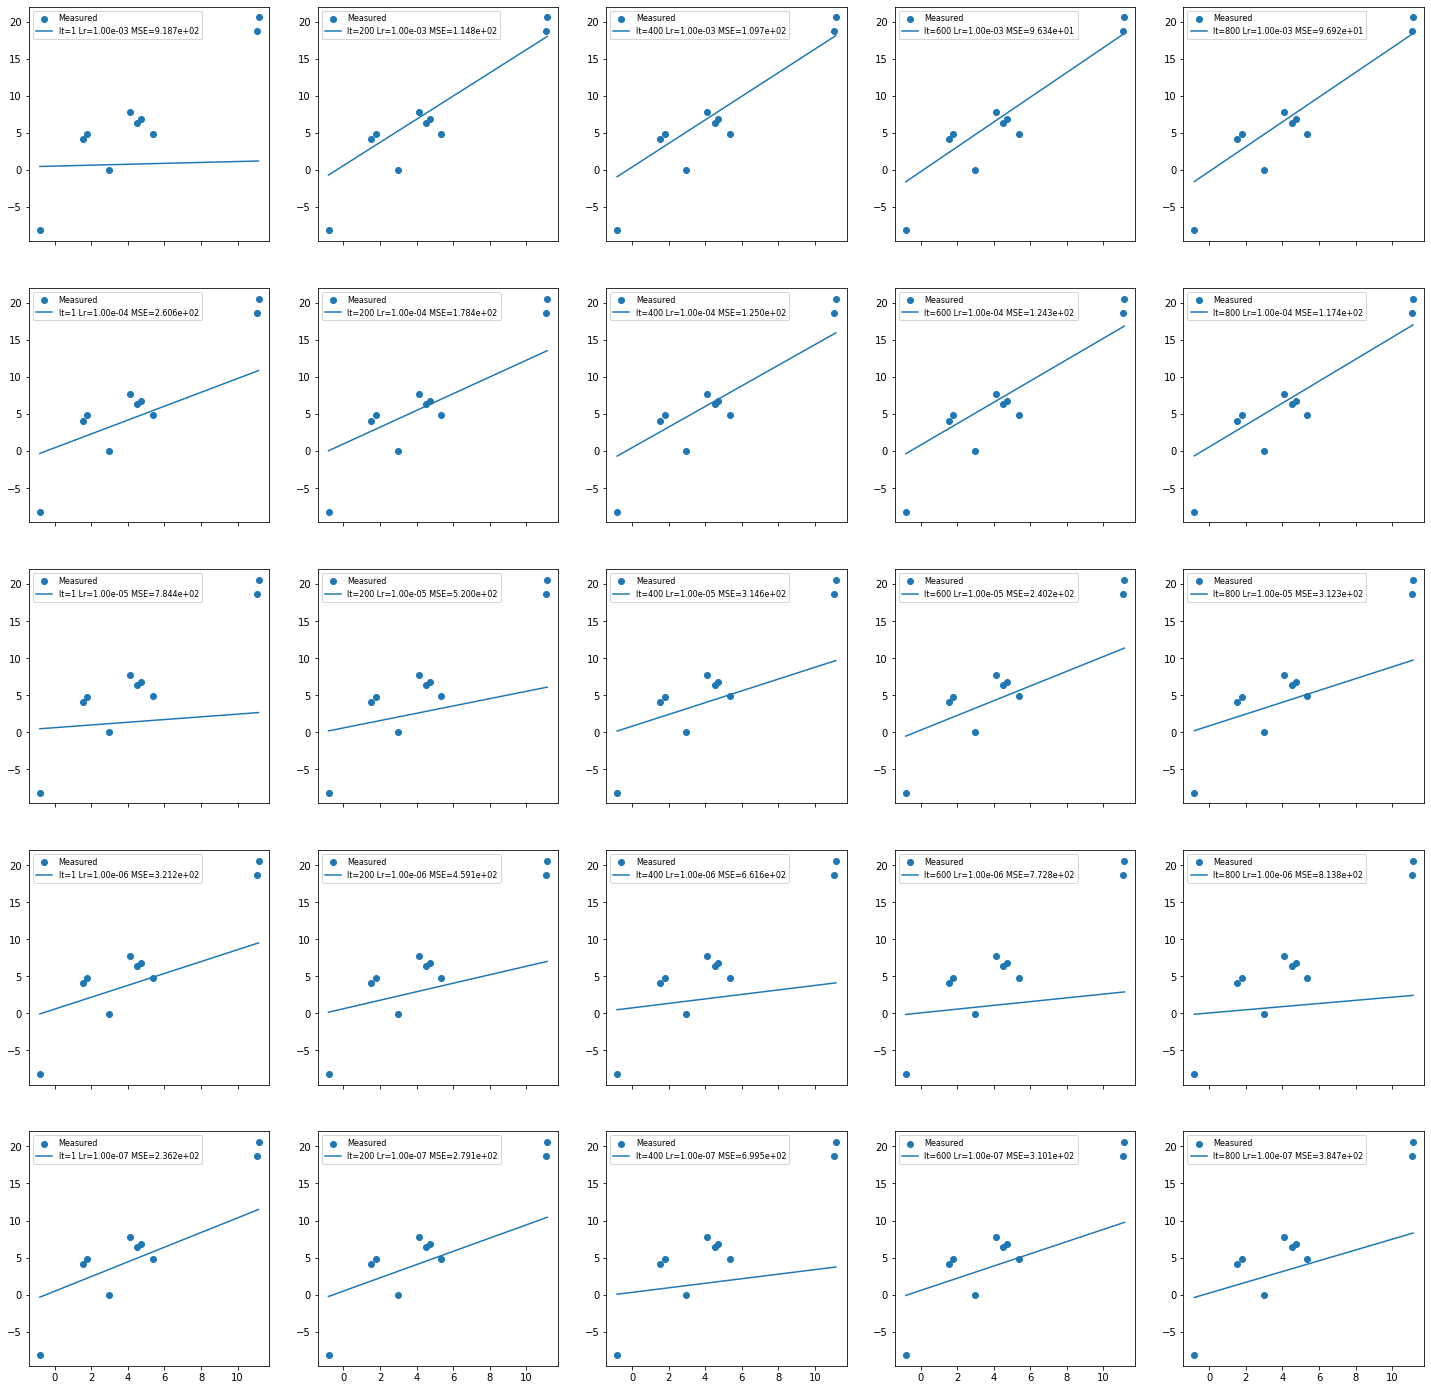

In [44]:
import matplotlib.pyplot as plt
import random

# Neste exemplo geramos um quadro com diferentes resultados de uma mesma regressão
# linear para diferentes combinações de taxa de aprendizado e número de iterações

# Setamos os limites inferiores e superiores do número de iterações
iterationRange = (1, 1000)

# Setamos quantas fatias queremos dentro destes limites (e.g. iterationRange/numberOfSlices => 1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999)
numberOfSlices = 5

# Criamos os vetores com os números de iterações e taxas de aprendizado
iterationStep = (iterationRange[1] - iterationRange[0]) / numberOfSlices
iterations = [int(iterationStep * i + iterationRange[0]) for i in range(numberOfSlices)]

learningRates = list(reversed([1e-7, 1e-6, 1e-5, 1e-4, 1e-3]))


def funcao_linear(a, b, x):
    return a * x + b


def gera_y_aproximado(a, b, x_medido):
    numeros = len(x_medido)
    y_aproximado = []
    # Para cada x_i, gera o valor aproximado de y_i(x_i) = a*x_i + b
    for i in range(numeros):
        y_aproximado.append(funcao_linear(a, b, x_medido[i]))
    return y_aproximado


def iteracao(a, b, x_medido, y_medido, taxa_aprendizagem):
    numeros = len(y_medido)

    y_aproximado = gera_y_aproximado(a, b, x_medido)

    # Calcula o ajuste para parâmetros 'a' e 'b'
    residuo_a = sum([(y_aproximado[i] - y_medido[i]) * x_medido[i] for i in range(numeros)]) / numeros
    residuo_b = sum([(y_aproximado[i] - y_medido[i]) for i in range(numeros)]) / numeros

    # Retorna os valores de 'a' e 'b' ajustados
    a = a - taxa_aprendizagem * residuo_a
    b = b - taxa_aprendizagem * residuo_b

    return a, b


def residuo_metodo_minimos_quadrados(y_medido, y_aproximado):
    residuo = 0
    for i in range(len(y_medido)):
        residuo += (y_medido[i] - y_aproximado[i]) ** 2
    return residuo


def minimizacao_residuo(x_medido, y_medido, taxa_aprendizagem, iteracoes=100):
    # Escolhemos 'a' e 'b' iniciais aleatoriamente
    a = random.random()
    b = random.random()

    # Depois executamos uma série de iterações,
    # ajustando os valores de 'a' e 'b' progressivamente
    for it in range(max(iteracoes, 1)):
        a, b = iteracao(a, b, x_medido, y_medido, taxa_aprendizagem)

        y_aproximado = gera_y_aproximado(a, b, x_medido)
        residuo = residuo_metodo_minimos_quadrados(y_medido, y_aproximado)
    return y_aproximado, residuo


# Gera uma grade com figuras representando resultado do treinamento para diferentes
# números de iterações e de taxa de aprendizagem
fig, axis = plt.subplots(nrows=numberOfSlices, ncols=numberOfSlices, sharex=True, figsize=(25, 25))

# Gera duas listas x e y de entrada
x = [i + random.gauss(0, 2) for i in range(10)]
y = [x[i] * 2 + random.gauss(0, 3) for i in range(10)]  # y(x) = 2*x + gaussian noise

#x = [3,21,22,34,54,34,55,67,89,99]
#y = [1,10,14,34,44,36,22,67,79,90]
plt.rc('legend', fontsize=8)

for i in range(numberOfSlices):
    for j in range(numberOfSlices):
        # Treina modelo, gera y aproximado e faz a plotagem
        y_pred, loss = minimizacao_residuo(x, y, taxa_aprendizagem=learningRates[i], iteracoes=iterations[j])
        axis[i][j].scatter(x, y, label="Measured")
        axis[i][j].plot(*list(zip(*sorted(zip(x, y_pred)))),
                        label="It=%d Lr=%.2e MSE=%.3e" % (iterations[j], learningRates[i], loss))
        axis[i][j].legend()

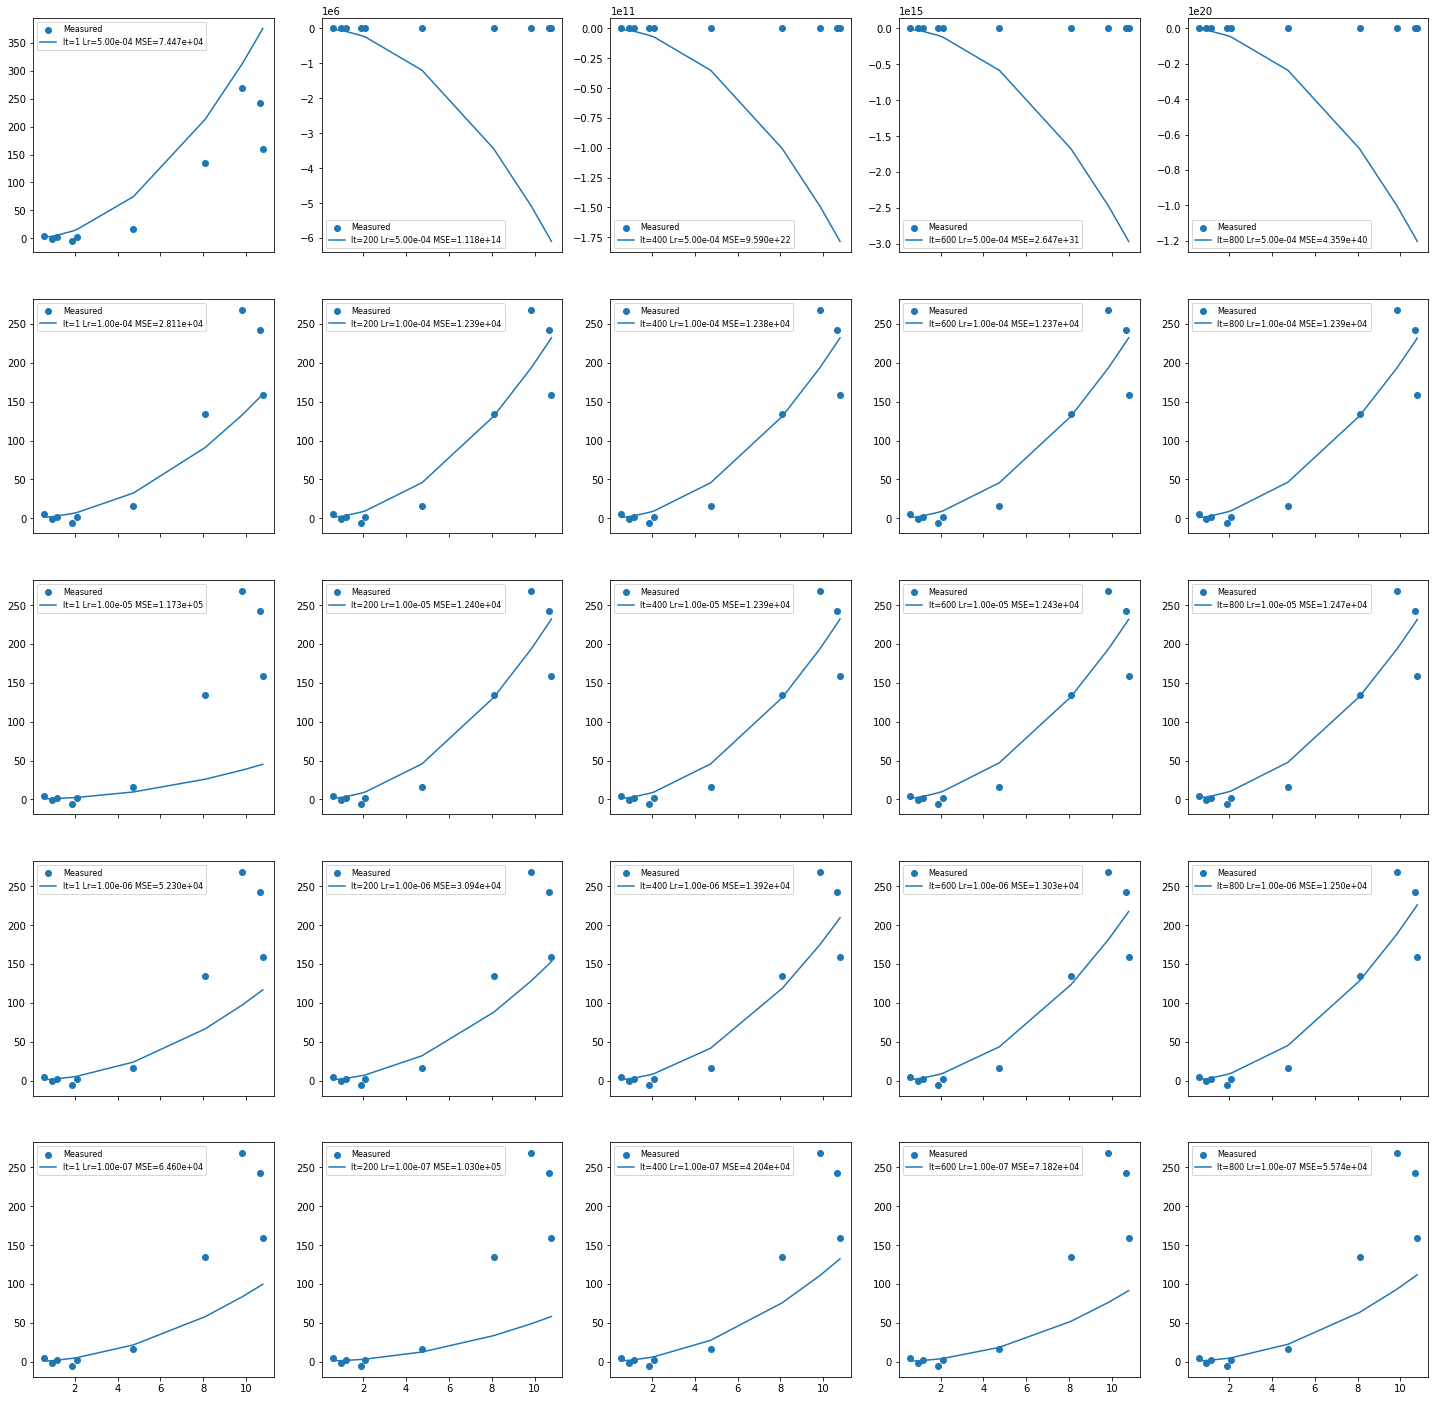

In [45]:
def funcao_quadratica(a, b, c, x):
    return a * x * x + x * b + c


def gera_y_aproximado(a, b, c, x_medido):
    numeros = len(x_medido)
    y_aproximado = []
    # Para cada x_i, gera o valor aproximado de y_i(x_i) = a*x_i + b
    for i in range(numeros):
        y_aproximado.append(funcao_quadratica(a, b, c, x_medido[i]))
    return y_aproximado


def iteracao(a, b, c, x_medido, y_medido, taxa_aprendizagem):
    numeros = len(y_medido)

    y_aproximado = gera_y_aproximado(a, b, c, x_medido)

    # Calcula o ajuste para parâmetros 'a', 'b' e 'c'
    residuo_a = sum([(y_aproximado[i] - y_medido[i]) * x_medido[i] * x_medido[i] for i in range(numeros)]) / numeros
    residuo_b = sum([(y_aproximado[i] - y_medido[i]) * x_medido[i] for i in range(numeros)]) / numeros
    residuo_c = sum([(y_aproximado[i] - y_medido[i]) * x_medido[i] for i in range(numeros)]) / numeros

    # Retorna os valores de 'a', 'b' e c ajustados
    a = a - taxa_aprendizagem * residuo_a
    b = b - taxa_aprendizagem * residuo_b
    c = c - taxa_aprendizagem * residuo_c
    return a, b, c


def residuo_metodo_minimos_quadrados(y_medido, y_aproximado):
    residuo = 0
    for i in range(len(y_medido)):
        residuo += (y_medido[i] - y_aproximado[i]) ** 2
    return residuo


def minimizacao_residuo(x_medido, y_medido, taxa_aprendizagem, iteracoes=100):
    # Escolhemos 'a', 'b' e 'c' iniciais aleatoriamente
    a = random.random()
    b = random.random()
    c = random.random()

    # Depois executamos uma série de iterações,
    # ajustando os valores de 'a' e 'b' progressivamente
    for it in range(max(iteracoes, 1)):
        a, b, c = iteracao(a, b, c, x_medido, y_medido, taxa_aprendizagem)

        y_aproximado = gera_y_aproximado(a, b, c, x_medido)
        residuo = residuo_metodo_minimos_quadrados(y_medido, y_aproximado)
    return y_aproximado, residuo


# Gera uma grade com figuras representando resultado do treinamento para diferentes
# números de iterações e de taxa de aprendizagem
fig, axis = plt.subplots(nrows=numberOfSlices, ncols=numberOfSlices, sharex=True, figsize=(25, 25))

# Gera duas listas x e y de entrada
x = [i + random.gauss(0, 2) for i in range(10)]
# y(x) = x^2 + noise*x + noise
y = [x[i] * x[i] * random.gauss(1, 0.5) + x[i] * random.gauss(0, 3) + random.gauss(0, 5) for i in
     range(10)]  # <= mude os desvios padrão dos ruídos

plt.rc('legend', fontsize=8)

learningRates = list(reversed([1e-7, 1e-6, 1e-5, 1e-4, 5e-4]))

for i in range(numberOfSlices):
    for j in range(numberOfSlices):
        # Treina modelo, gera y aproximado e faz a plotagem
        y_pred, loss = minimizacao_residuo(x, y, taxa_aprendizagem=learningRates[i], iteracoes=iterations[j])
        axis[i][j].scatter(x, y, label="Measured")
        axis[i][j].plot(*list(zip(*sorted(zip(x, y_pred)))),
                        label="It=%d Lr=%.2e MSE=%.3e" % (iterations[j], learningRates[i], loss))
        axis[i][j].legend()